In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.shape

(3276, 10)

In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
data.shape

(2011, 10)

In [7]:
data['Potability'].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

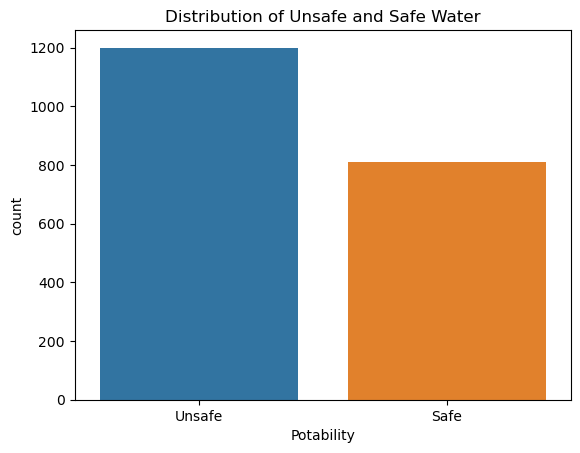

In [8]:
sns.countplot(data = data, x='Potability')
plt.title("Distribution of Unsafe and Safe Water")
plt.xticks([0,1],['Unsafe','Safe'])
plt.show()

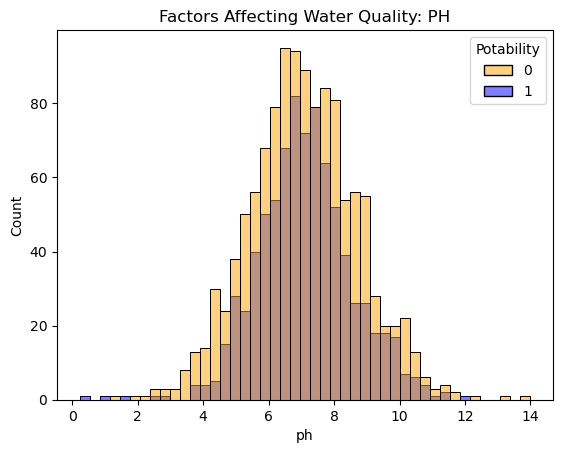

In [9]:
sns.histplot(data=data, x="ph", hue="Potability", palette=['orange', 'blue'])
plt.title('Factors Affecting Water Quality: PH')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

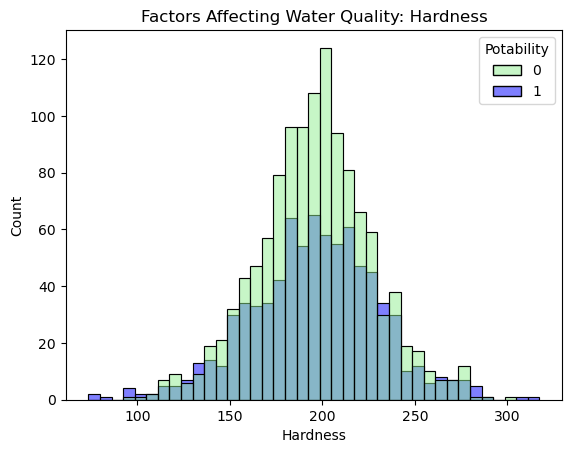

In [10]:
sns.histplot(data=data, x="Hardness", hue="Potability", palette=['lightgreen', 'blue'])
plt.title('Factors Affecting Water Quality: Hardness')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

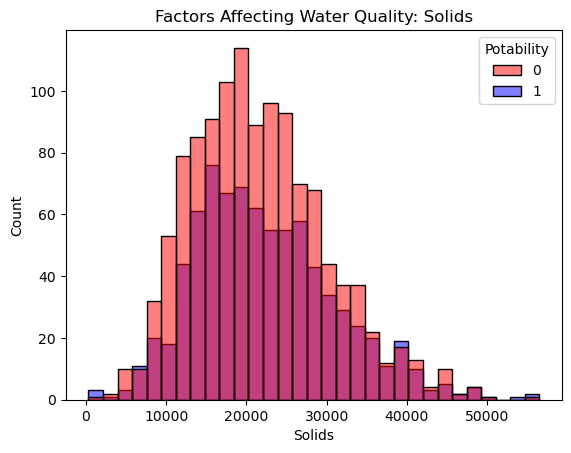

In [11]:
sns.histplot(data=data, x="Solids", hue="Potability", palette=['red', 'blue'])
plt.title('Factors Affecting Water Quality: Solids')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

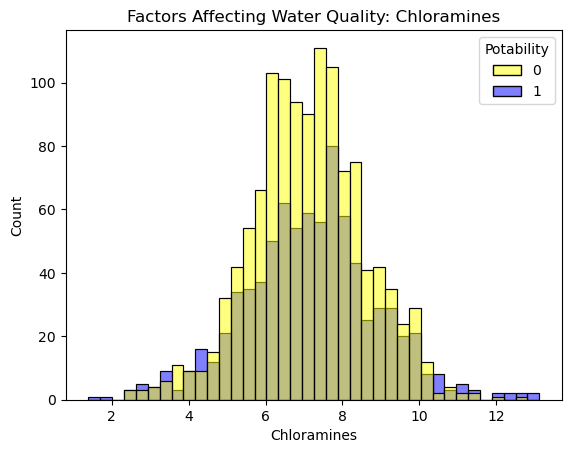

In [12]:
sns.histplot(data=data, x="Chloramines", hue="Potability", palette=['yellow', 'blue'])
plt.title('Factors Affecting Water Quality: Chloramines')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

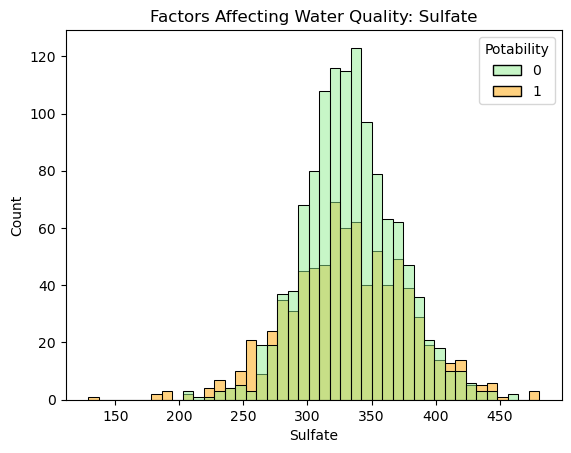

In [13]:
sns.histplot(data=data, x="Sulfate", hue="Potability", palette=['lightgreen', 'orange'])
plt.title('Factors Affecting Water Quality: Sulfate')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

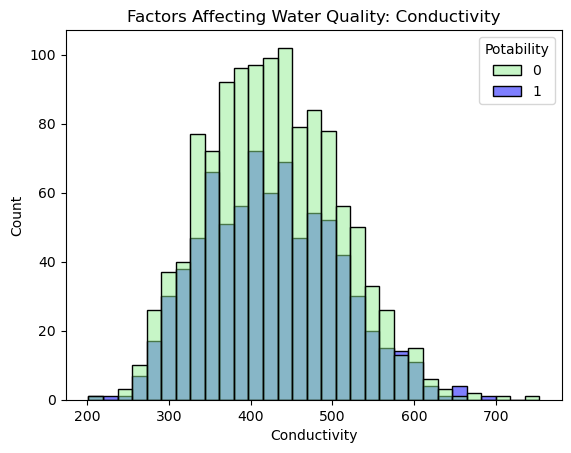

In [14]:
sns.histplot(data=data, x="Conductivity", hue="Potability", palette=['lightgreen', 'blue'])
plt.title('Factors Affecting Water Quality: Conductivity')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

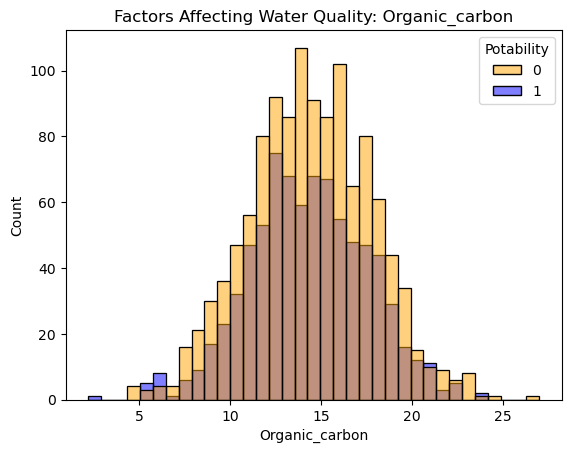

In [15]:
sns.histplot(data=data, x="Organic_carbon", hue="Potability", palette=['orange', 'blue'])
plt.title('Factors Affecting Water Quality: Organic_carbon')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

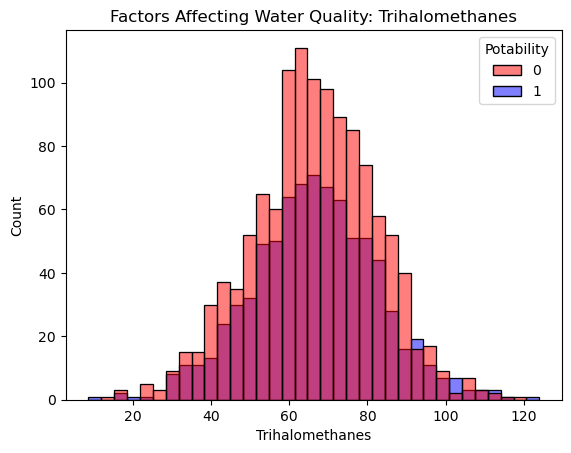

In [16]:
sns.histplot(data=data, x="Trihalomethanes", hue="Potability", palette=['red', 'blue'])
plt.title('Factors Affecting Water Quality: Trihalomethanes')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

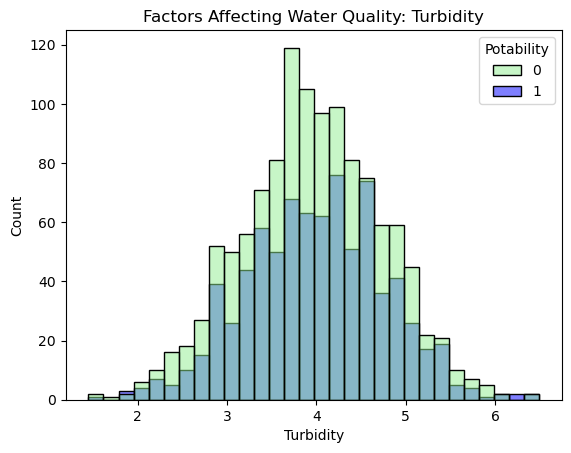

In [17]:
sns.histplot(data=data, x="Turbidity", hue="Potability", palette=['lightgreen', 'blue'])
plt.title('Factors Affecting Water Quality: Turbidity')
# plt.legend(labels = ['Unsafe','Safe'])
plt.show()

In [18]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [21]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [39]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [28]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Training the model 

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [36]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[280  29]
 [121  73]]


0.7017892644135189